In [1]:
# uncomment the line below to enable realtime graphs
# %matplotlib ipympl

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from custom_interfaces.NeoInterface import NeoInterface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)
neo.resuscitation(False)

# close the ductus arteriosus
models["Pda"].no_flow = True

# close the foramen ovale
models["FO"].no_flow = False

# stabilize the model by calculating 60 seconds
neo.calculate(60)

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 4.2 sec. Average model step in 0.0347 ms.


In [8]:
models["Pda"].open_ductus(2, 5.0)

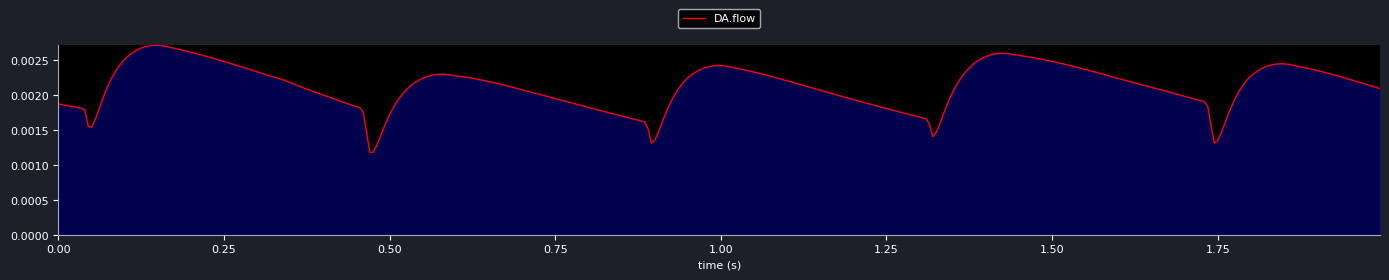


Stroke volume calculation might be inaccurate. Try using a sampleinterval of 0.0005
DA.flow         : net  128.47913, forward  128.47913, backward        0.0 ml/min, stroke volume:    0.90818 ml, 


In [17]:
neo.plot_time_graph(["DA.flow"], time_to_calculate=2)

In [16]:
neo.analyze(["DA.flow"], time_to_calculate=10, weight_based=True)


Stroke volume calculation might be inaccurate. Try using a sampleinterval of 0.0005
DA.flow         : net   38.24561, forward   38.24561, backward        0.0 ml/kg/min, stroke volume:    0.27054 ml/kg, 


{'DA.flow.sv': 0.27054,
 'DA.flow.net': 38.24561,
 'DA.flow.forward': 38.24561,
 'DA.flow.backward': 0.0}